In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
#load data
df = pd.read_csv('email.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


(5171, 4)




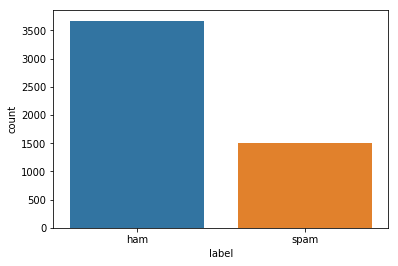

In [3]:
print(df.shape)
print("\n" + "="*50 + "\n")
sns.countplot(x='label', data=df)
plt.show()

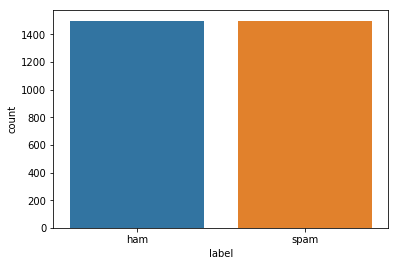

In [17]:
#Balance the dataset so that the majority class (Ham) match the minority class (Spam).
ham_msg = df[df['label'] == 'ham']
spam_msg = df[df['label'] == 'spam']

# Downsample Ham emails to match the number of Spam emails
balanced_ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

# Combine balanced data
balanced_data = pd.concat([balanced_ham_msg, spam_msg]).reset_index(drop=True)
# Visualize the balanced dataset
sns.countplot(x='label', data=balanced_data)
plt.show()

In [18]:
email_content=balanced_data['text']
label=balanced_data['label']

In [19]:
#Text Preprocessing: That is to Clean and transform the email text into a numerical representation that a machine learning model can understand.
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

balanced_data['processed_email'] = email_content.apply(preprocess_text)


print(balanced_data['processed_email'].head())


0    subject conoco big cowboy darren i m not sure ...
1    subject feb prod sale to teco gas processing s...
2    subject california energy crisis california  ...
3    subject re nom actual volume for april rd we a...
4    subject eastrans nomination changes effective ...
Name: processed_email, dtype: object


In [20]:
#Feature Extraction
#Term Frequency (TF): How often a word appears in a document.
#Inverse Document Frequency (IDF): A measure of how rare a word is across all documents. 
vectorizer = TfidfVectorizer(max_features=200, stop_words='english')

In [21]:
# Fit and transform the processed email content
X = vectorizer.fit_transform(balanced_data['processed_email'])
y = balanced_data['label']

# Convert labels to numerical format (0 for ham, 1 for spam)
y = y.map({'ham': 0, 'spam': 1})

print("Shape of TF-IDF features (X):", X.shape)
print("First 5 feature names (most frequent words):", vectorizer.get_feature_names()[:5])
print("\n" + "="*50 + "\n")

Shape of TF-IDF features (X): (2998, 200)
First 5 feature names (most frequent words): ['account', 'act', 'address', 'advice', 'agreement']




In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")
print("\n" + "="*50 + "\n")

Training data shape: (2398, 200), (2398,)
Testing data shape: (600, 200), (600,)




In [23]:
# Initialize and train a Multinomial Naive Bayes classifier
# Naive Bayes is a good choice for text classification due to its simplicity and effectiveness.
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# Prediction and Evaluation

y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "="*50 + "\n")


Model Evaluation:
Accuracy: 0.9433
Precision: 0.9010
Recall: 0.9895
F1-Score: 0.9431




In [26]:
def predict_new_email(email_text):
    # Preprocess the input
    processed = preprocess_text(email_text)
    
    # Convert to TF-IDF vector (must reshape into a list)
    vector = vectorizer.transform([processed])
    
    # Predict using the trained model
    prediction = model.predict(vector)[0]
    
    # Map prediction back to label
    label_map = {0: 'Ham', 1: 'Spam'}
    return label_map[prediction]

# Example usage
new_email = "Congratulations! You've won a free iPhone. Click here to claim your prize."
print("Prediction for new email:", predict_new_email(new_email))

new_email1 = "Urgent: Meeting time changed to 2pm Friday"
print("Prediction for new email:", predict_new_email(new_email1))


Prediction for new email: Spam
Prediction for new email: Ham
